## Improting Essential Lobraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Creating Path

In [2]:
import os

# Base directory for the competition data
data_dir = '/kaggle/input/playground-series-s5e10'

# Initialize variables to store the full paths
train_file_path = None
test_file_path = None
submission_file_path = None

# os.walk yields (root_directory, list_of_directories, list_of_files)
for root, dirs, files_in_dir in os.walk(data_dir):
    # Iterate through the files found in the current directory (root)
    for filename in files_in_dir:
        # Construct the full path
        full_path = os.path.join(root, filename)

        # Check the file name and assign the full path
        if filename.startswith('train'):
            train_file_path = full_path
        elif filename.startswith('test'):
            test_file_path = full_path
        elif filename.startswith('sample_submission'): # Often 'sample_submission' or similar
            submission_file_path = full_path

# Display the results
print(f"Train File Path: {train_file_path}")
print(f"Test File Path: {test_file_path}")
print(f"Submission File Path: {submission_file_path}")

# Now you can use these paths to load your data with pandas:
# import pandas as pd
# df_train = pd.read_csv(train_file_path)

Train File Path: /kaggle/input/playground-series-s5e10/train.csv
Test File Path: /kaggle/input/playground-series-s5e10/test.csv
Submission File Path: /kaggle/input/playground-series-s5e10/sample_submission.csv


## Creating Dataframe

In [3]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
submission_df = pd.read_csv(submission_file_path)

# Working with train_df

## Basis Statistics of train_df

In [4]:
train_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
id_var = train_df['id']
train_df.drop(columns=['id'],inplace=True)
train_df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 37.5+ MB


All the datatyes of the features are correct 

## Lets check the blankspaces and other values not related to feature in traun_df

In [7]:
train_df = train_df.replace(' ', np.nan)
train_df.isna().sum()

road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [8]:
train_df.describe()

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,7.000000,1.000000


## EDA

In [9]:
numerical_cols = train_df.select_dtypes(include=['int64','float64']).columns
categorical_cols = train_df.select_dtypes(exclude=['int64','float64','bool']).columns
boolean_cols = train_df.select_dtypes(include=['bool']).columns

Text(0.5, 1.0, 'Density_plot')

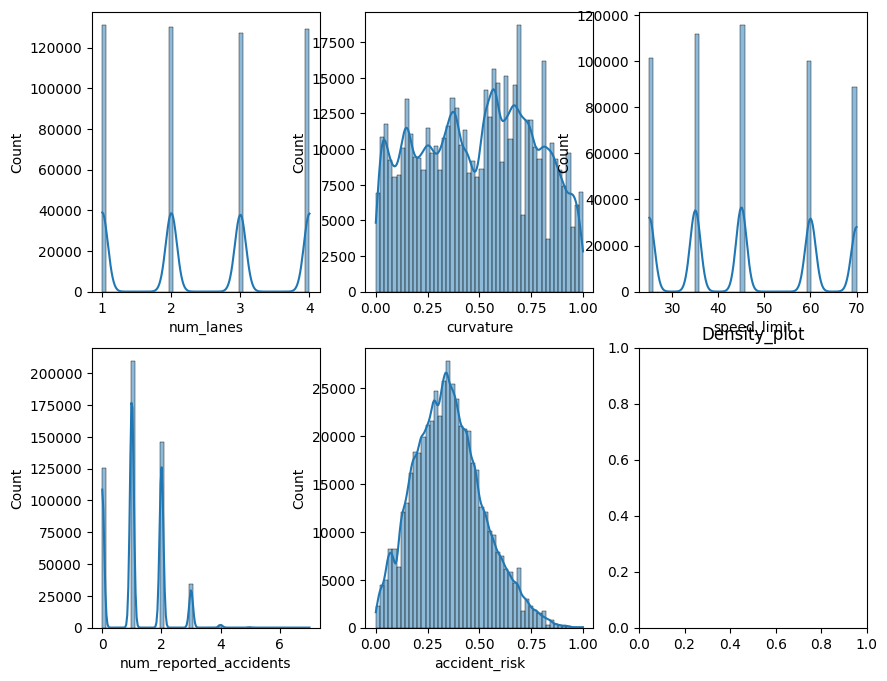

In [10]:
## Checking the density plot of numerical _features
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(10,8))
count = 0
for i in range(2):
    for j in range(3):
        if count == len(numerical_cols):
            break
        sns.histplot(data=train_df,x=numerical_cols[count],bins=50,kde=True,ax=ax[i][j])
        count+=1
    
plt.title('Density_plot') 

Text(0.5, 0.98, 'Box_plot')

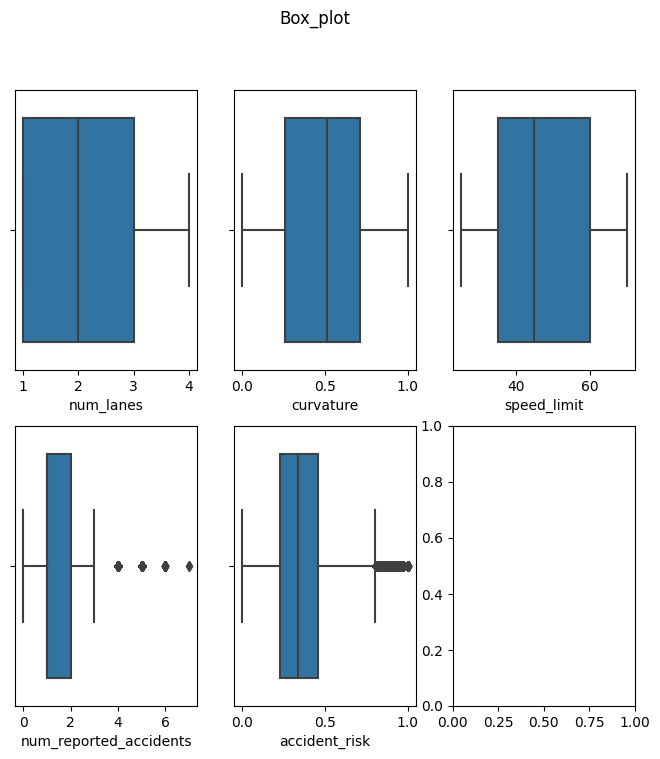

In [11]:
## checking for outlier 
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(8,8))
count = 0
for i in range(2):
    for j in range(3):
        if count == len(numerical_cols):
            break
        sns.boxplot(data=train_df,x=numerical_cols[count],ax=ax[i][j])
        count+=1
fig.suptitle('Box_plot')

Text(0.5, 0.98, 'violinplot')

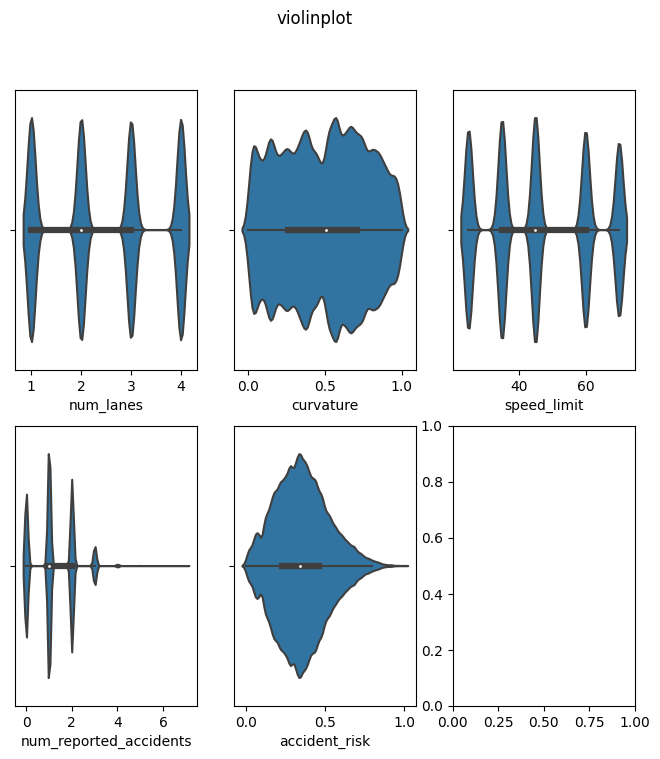

In [12]:
## checling the violin plot 
### To ensure that the num_reported_accident outlier are actually outliers or not 
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(8,8))
count = 0
for i in range(2):
    for j in range(3):
        if count == len(numerical_cols):
            break
        sns.violinplot(data=train_df,x=numerical_cols[count],ax=ax[i][j])
        count+=1
fig.suptitle('violinplot')

So form looking toward the num_reported_accident we should remove the values greater that 3 

In [13]:
len(train_df) - len(train_df[train_df['num_reported_accidents'] > 3]) , len(train_df)

(515105, 517754)

Ya so we can drop those values because they are very less

In [14]:
train_df = (train_df[train_df['num_reported_accidents'] < 3])
train_df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [15]:
def eda(train_df):
    train_df = (train_df[train_df['num_reported_accidents'] < 3])
    return train_df

<Axes: xlabel='road_type'>

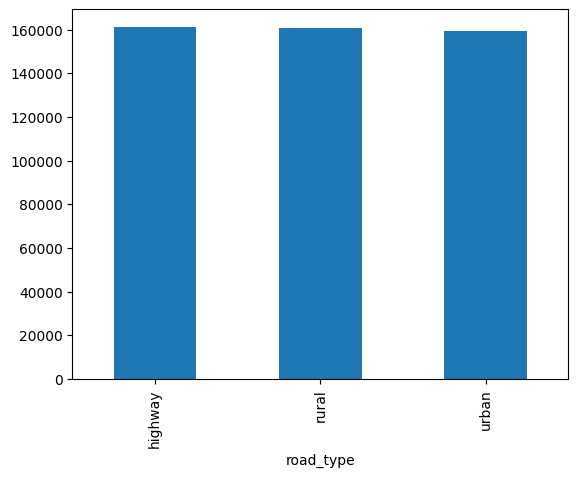

In [16]:
### lets look the countplt/frequency table of categorical features
train_df['road_type'].value_counts().plot.bar()

<Axes: xlabel='weather'>

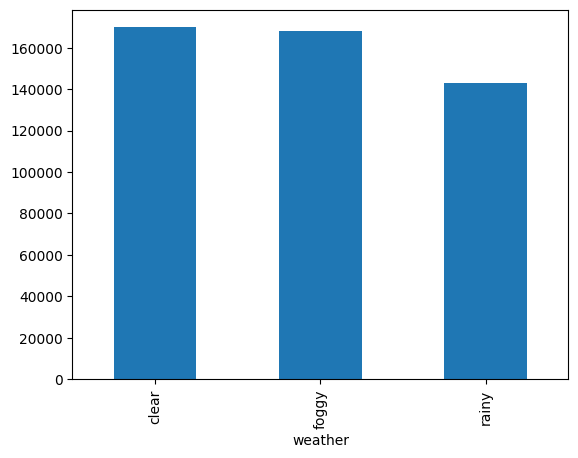

In [17]:
train_df['weather'].value_counts().plot.bar()

## Feature Engineering

In [18]:
## as this is the regression problem and also evaluated on "root_mean_squared_error" so lets build 

In [19]:
numerical_cols

Index(['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')

In [20]:
train_df['Density_Index'] = train_df['speed_limit'] / train_df['num_lanes']
train_df['Complex_Risk'] = train_df['curvature'] * train_df['speed_limit']
train_df['Accident_Rate'] = train_df['num_reported_accidents'] / train_df['num_lanes']

In [21]:
# Binning speed_limit
bins = [0, 30, 60, 100] # Define bins for speed limits
labels = ['Low_Speed', 'Medium_Speed', 'High_Speed']
train_df['Speed_Category'] = pd.cut(
    train_df['speed_limit'], 
    bins=bins, 
    labels=labels, 
    right=False
)

In [22]:
# Log transform 
train_df['log_curvature'] = np.log1p(train_df['curvature'])
# Square root transform
train_df['sqrt_num_lanes'] = np.sqrt(train_df['num_lanes'])

In [23]:
train_df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk,Density_Index,Complex_Risk,Accident_Rate,Speed_Category,log_curvature,sqrt_num_lanes
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13,17.50,2.10,0.50,Medium_Speed,0.058269,1.414214
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35,8.75,34.65,0.00,Medium_Speed,0.688135,2.000000
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30,17.50,44.10,0.50,High_Speed,0.488580,2.000000
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21,8.75,2.45,0.25,Medium_Speed,0.067659,2.000000
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56,60.00,34.80,1.00,High_Speed,0.457425,1.000000


In [24]:
## fuction later to perform on test 
def feature_engineering(train_df):
    # retio and product
    train_df['Density_Index'] = train_df['speed_limit'] / train_df['num_lanes']
    train_df['Complex_Risk'] = train_df['curvature'] * train_df['speed_limit']
    train_df['Accident_Rate'] = train_df['num_reported_accidents'] / train_df['num_lanes']
    # Binning speed_limit
    bins = [0, 30, 60, 100] # Define bins for speed limits
    labels = ['Low_Speed', 'Medium_Speed', 'High_Speed']
    train_df['Speed_Category'] = pd.cut(
        train_df['speed_limit'], 
        bins=bins, 
        labels=labels, 
        right=False
    )
    # Log transform 
    train_df['log_curvature'] = np.log1p(train_df['curvature'])
    # Square root transform
    train_df['sqrt_num_lanes'] = np.sqrt(train_df['num_lanes'])
    return train_df

## Encoding the model 

In [25]:
unique_vals = {}
for col in categorical_cols:
    vals = train_df[col].unique()
    unique_vals[col] = vals

## print
for key,value in unique_vals.items():
    print(f"columns {key}")
    print(f"unique_values : {value}")
    print('--'*30)

columns road_type
unique_values : ['urban' 'rural' 'highway']
------------------------------------------------------------
columns lighting
unique_values : ['daylight' 'dim' 'night']
------------------------------------------------------------
columns weather
unique_values : ['rainy' 'clear' 'foggy']
------------------------------------------------------------
columns time_of_day
unique_values : ['afternoon' 'evening' 'morning']
------------------------------------------------------------


In [26]:
def encode(train_df):
    categorical_cols = train_df.select_dtypes(include=['object','category']).columns
    temp_df = train_df.copy(deep=True)
    encoded_df = pd.get_dummies(train_df,columns=categorical_cols,drop_first=True)
    return encoded_df

In [27]:
train_df = encode(train_df)

## Lets split the data for model training 

In [28]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns=['accident_risk'])
y = train_df['accident_risk']
## train test split
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
## validation split 
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state=42,test_size=0.2)

## Preprocessing the numerical values

In [29]:
X_train

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,Density_Index,Complex_Risk,...,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,Speed_Category_Medium_Speed,Speed_Category_High_Speed
104836,2,0.15,60,False,True,True,False,1,30.0,9.00,...,False,True,False,False,False,True,True,False,False,True
20236,3,0.11,45,False,True,False,False,0,15.0,4.95,...,False,True,True,False,True,False,True,False,True,False
408440,1,0.14,70,False,False,True,False,0,70.0,9.80,...,True,False,False,False,False,False,True,False,False,True
111597,3,0.64,45,False,False,True,False,1,15.0,28.80,...,False,False,False,False,True,False,True,False,True,False
88886,2,0.66,70,False,True,False,False,1,35.0,46.20,...,False,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89442,2,0.79,70,False,True,False,True,2,35.0,55.30,...,True,False,False,True,False,False,False,False,False,True
371159,2,0.04,35,False,False,False,False,2,17.5,1.40,...,False,False,False,False,True,False,True,False,True,False
33531,2,0.79,35,True,True,True,True,0,17.5,27.65,...,False,False,False,True,False,True,False,False,True,False
366877,3,0.72,60,False,False,False,True,2,20.0,43.20,...,False,False,True,False,True,False,False,False,False,True


In [30]:
X_numerical_columns = X.select_dtypes(include=['int64','float64']).columns
X_categorical_columns = X.select_dtypes(include=['object','category']).columns
X_boolean_columns = X.select_dtypes(include=['bool']).columns

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
def preprocessing(X_train_df, X_test_df, X_val_df):
    """
    Applies StandardScaler to numerical columns across training, test, and validation sets.
    The scaler is fit only on the training data.
    """
    # Create copies to avoid SettingWithCopyWarning
    X_train = X_train_df.copy()
    X_test = X_test_df.copy()
    X_val = X_val_df.copy()
    
    # Identify numerical columns based on the training set
    # NOTE: Assuming all three sets have the same columns
    numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
    
    # 1. Initialize and Fit Scaler ONLY on X_train
    scalar = StandardScaler()
    scalar.fit(X_train[numerical_cols])
    
    # 2. Transform all three sets using .loc for safe assignment
    
    # Training Set
    X_train.loc[:, numerical_cols] = scalar.transform(X_train[numerical_cols])
    
    # Test Set
    X_test.loc[:, numerical_cols] = scalar.transform(X_test[numerical_cols])
    
    # Validation Set
    X_val.loc[:, numerical_cols] = scalar.transform(X_val[numerical_cols])
    
    # NOTE: You would perform encoding (like OneHotEncoder) for
    # categorical/boolean columns here, also fitting only on X_train.
    
    return X_train, X_test, X_val,scalar

# Example of how to call it:
# X_train_scaled, X_test_scaled, X_val_scaled = preprocessing_fixed(X_train, X_test, X_val)

In [33]:
X_train,X_test,X_val,scalar = preprocessing(X_train,X_test,X_val)


In [34]:
X_val

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,Density_Index,Complex_Risk,...,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,Speed_Category_Medium_Speed,Speed_Category_High_Speed
309744,0.458912,-1.039471,1.531403,False,False,True,False,-1.392308,-0.046564,-0.554066,...,False,False,True,False,True,False,False,True,False,True
12848,-0.433715,-1.596721,1.531403,True,True,False,True,1.278068,0.664851,-1.255617,...,False,True,False,False,True,False,False,True,False,True
364336,-0.433715,1.523879,0.894933,True,True,True,True,1.278068,0.359959,2.085103,...,False,True,True,False,True,False,False,False,False,True
275273,1.351540,-0.259321,0.894933,False,False,False,True,-0.057120,-0.554717,0.160848,...,True,False,True,False,False,False,True,False,False,True
118323,-0.433715,-1.373821,-1.332714,False,True,True,False,-1.392308,-0.707164,-1.275662,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472173,-1.326343,1.672479,0.894933,False,True,True,True,-1.392308,2.189311,2.245458,...,False,True,False,True,True,False,True,False,False,True
105418,1.351540,1.375279,-1.332714,True,False,False,False,-1.392308,-1.088279,-0.039595,...,False,True,False,False,False,False,False,True,False,False
473768,-1.326343,-1.113771,-0.059773,False,True,True,True,-0.057120,1.274635,-0.931567,...,False,False,False,True,False,False,False,False,True,False
411864,0.458912,-1.002321,1.531403,False,False,True,True,1.278068,-0.046564,-0.507296,...,False,True,False,False,True,False,True,False,False,True


## Lets build the preliminary model 

### 1. Xgboost

In [35]:
from xgboost import XGBRegressor

In [36]:
X_train.dtypes

num_lanes                      float64
curvature                      float64
speed_limit                    float64
road_signs_present                bool
public_road                       bool
holiday                           bool
school_season                     bool
num_reported_accidents         float64
Density_Index                  float64
Complex_Risk                   float64
Accident_Rate                  float64
log_curvature                  float64
sqrt_num_lanes                 float64
road_type_rural                   bool
road_type_urban                   bool
lighting_dim                      bool
lighting_night                    bool
weather_foggy                     bool
weather_rainy                     bool
time_of_day_evening               bool
time_of_day_morning               bool
Speed_Category_Medium_Speed       bool
Speed_Category_High_Speed         bool
dtype: object

In [37]:
xgb_reg = XGBRegressor(
        n_estimators = 500,
        objective= "reg:squarederror",
        eval_metric= "rmse",
    early_stopping_rounds = 100
)
xgb_reg.fit(
    X_train,y_train,
    eval_set = [(X_train,y_train),(X_val,y_val)],
    verbose = True
)

[0]	validation_0-rmse:0.11868	validation_1-rmse:0.11842
[1]	validation_0-rmse:0.09378	validation_1-rmse:0.09363
[2]	validation_0-rmse:0.07832	validation_1-rmse:0.07824
[3]	validation_0-rmse:0.06839	validation_1-rmse:0.06837
[4]	validation_0-rmse:0.06293	validation_1-rmse:0.06293
[5]	validation_0-rmse:0.06000	validation_1-rmse:0.05999
[6]	validation_0-rmse:0.05824	validation_1-rmse:0.05825
[7]	validation_0-rmse:0.05721	validation_1-rmse:0.05721
[8]	validation_0-rmse:0.05668	validation_1-rmse:0.05667
[9]	validation_0-rmse:0.05640	validation_1-rmse:0.05639
[10]	validation_0-rmse:0.05620	validation_1-rmse:0.05621
[11]	validation_0-rmse:0.05610	validation_1-rmse:0.05611
[12]	validation_0-rmse:0.05603	validation_1-rmse:0.05605
[13]	validation_0-rmse:0.05596	validation_1-rmse:0.05599
[14]	validation_0-rmse:0.05592	validation_1-rmse:0.05596
[15]	validation_0-rmse:0.05587	validation_1-rmse:0.05592
[16]	validation_0-rmse:0.05582	validation_1-rmse:0.05588
[17]	validation_0-rmse:0.05580	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
from sklearn.metrics import mean_squared_error
y_pred = xgb_reg.predict(X_train)
train_error = mean_squared_error(y_train,y_pred)
y_pred = xgb_reg.predict(X_test)
test_error = mean_squared_error(y_test,y_pred)
print(f"Training error :{train_error}")
print(f'Testing error :{test_error}')

Training error :0.003028389249026235
Testing error :0.003128606227512619


In [39]:
##debuging 
X_train.shape

(307780, 23)

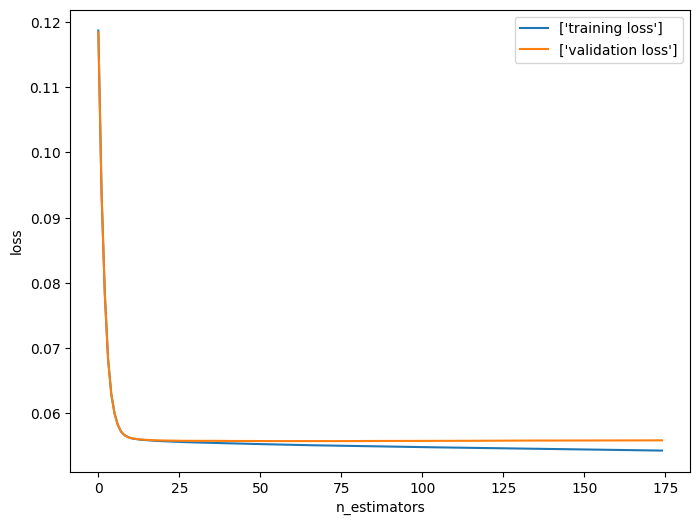

In [40]:
train_loss = xgb_reg.evals_result()['validation_0']['rmse']
val_loss = xgb_reg.evals_result()['validation_1']['rmse']
plt.figure(figsize=(8,6))
plt.plot(train_loss,label=['training loss'])
plt.plot(val_loss,label=['validation loss'])
plt.xlabel('n_estimators')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

Xgboost is now working great after validating the X_val correctly

## so now with out hyoerparameter tuning it is performing great so ok

## Working on testing set 

In [41]:
test_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [42]:
submission_df.head()

,id,accident_risk
0,517754,0.352
1,517755,0.352
2,517756,0.352
3,517757,0.352
4,517758,0.352


In [43]:
def _test_(df):
    id_var = df['id']
    df.drop(columns=['id'],inplace=True)
    df = feature_engineering(df)
    df = encode(df)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df.loc[:,numerical_cols] = scalar.transform(df[numerical_cols])
    y_pred = xgb_reg.predict(df)
    return y_pred,id_var

In [44]:
y_pred ,id_var = _test_(test_df)

In [45]:
test_df.shape , submission_df.shape

((172585, 18), (172585, 2))

In [46]:
y_pred.shape

(172585,)

In [47]:
# Prepare submission
sub = pd.DataFrame({
    "id": id_var,
    "accident_risk": y_pred
})

# Save submission file
sub.to_csv("submission.csv", index=False)

In [48]:
import joblib

In [49]:
joblib.dump(scalar,'standard_scalar.pkl')
joblib.dump(xgb_reg,'xgboost_model.pkl')

['xgboost_model.pkl']